## Data Acquisition

In [1]:
import numpy as np
from sklearn import datasets
digits = datasets.load_digits()
raw_data = digits.images
target = digits.target

## Initial Data Analysis

In [2]:
print(f'Dataset type: {type(raw_data)}')
print(f'Target type: {type(target)}')
print(f'Dataset shape: {raw_data.shape}')
print(f'Target shape: {target.shape}')

Dataset type: <class 'numpy.ndarray'>
Target type: <class 'numpy.ndarray'>
Dataset shape: (1797, 8, 8)
Target shape: (1797,)


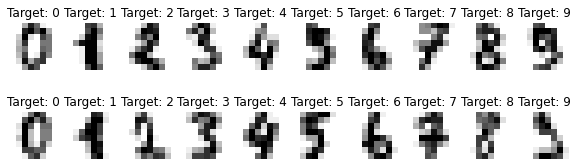

In [3]:
import matplotlib.pyplot as plt
_, axes = plt.subplots(nrows=2, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes.reshape(-1), raw_data, target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title('Target: %i' % label)



## Setup Experiment

### Preprocessing Data
Adapt the data to be manageable by the algorithms we want to use 

In [4]:
data = raw_data.reshape((len(raw_data), -1))
data.shape # first dimension as before, second and third have been reshaped

(1797, 64)

We omit scaling, as the data are already in the same range 0..16

### Split data 2 ways
Create training, test, and validation data

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5, shuffle=True, stratify=target)

In [6]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(898, 64) (898,) (899, 64) (899,)


## Training (Machine Learning)

In [84]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(2, weights='uniform', metric="euclidean", algorithm="brute")

# Train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

## Evaluation
* Classify data instances, that the classifier did __not__ see during the training phase
* Check how many are classified correctly

In [85]:
y_test_pred = clf.predict(X_test)
y_test_pred

array([0, 8, 5, 7, 6, 9, 5, 7, 5, 6, 0, 9, 9, 8, 4, 2, 3, 6, 8, 3, 0, 4,
       4, 3, 2, 1, 5, 0, 9, 9, 9, 4, 4, 1, 9, 3, 9, 1, 8, 8, 6, 5, 5, 2,
       7, 9, 2, 0, 1, 3, 8, 2, 6, 2, 9, 8, 2, 3, 8, 3, 6, 7, 7, 5, 6, 6,
       2, 4, 4, 6, 9, 0, 9, 7, 0, 1, 4, 8, 8, 7, 2, 2, 7, 0, 1, 1, 8, 4,
       6, 7, 7, 3, 4, 7, 5, 7, 1, 1, 7, 0, 6, 2, 1, 6, 4, 0, 2, 9, 0, 2,
       1, 7, 9, 3, 7, 1, 2, 4, 1, 7, 9, 5, 0, 2, 5, 0, 0, 9, 6, 8, 5, 9,
       1, 9, 1, 7, 2, 2, 6, 1, 0, 4, 4, 9, 3, 7, 8, 9, 9, 2, 8, 3, 8, 5,
       1, 7, 4, 5, 5, 3, 3, 5, 3, 4, 2, 6, 8, 1, 3, 5, 9, 8, 9, 7, 5, 1,
       4, 7, 1, 0, 1, 7, 0, 1, 2, 3, 6, 2, 2, 6, 3, 1, 1, 7, 4, 9, 3, 2,
       9, 1, 7, 6, 3, 3, 5, 7, 0, 6, 2, 8, 5, 1, 0, 8, 3, 5, 3, 0, 1, 3,
       0, 3, 5, 9, 9, 4, 0, 5, 8, 1, 4, 5, 2, 1, 9, 3, 8, 7, 0, 0, 7, 5,
       4, 7, 4, 3, 7, 9, 9, 4, 7, 0, 8, 6, 5, 9, 1, 3, 0, 1, 6, 8, 8, 4,
       0, 2, 6, 3, 7, 9, 5, 9, 1, 3, 4, 7, 1, 0, 1, 2, 1, 0, 9, 5, 3, 1,
       2, 3, 9, 6, 1, 8, 2, 3, 7, 1, 6, 4, 4, 2, 6,

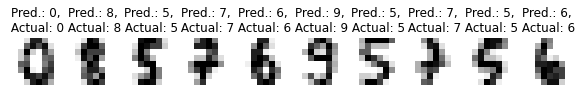

In [86]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, prediction, actual in zip(axes, X_test, y_test_pred, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred.: {prediction},\n Actual: {actual}')

In [87]:
from sklearn import metrics
round(metrics.accuracy_score(y_test, y_test_pred),3)

0.973

### Comparison to Random Baseline: 
* 10 classes, random guessing of the correct class
* expected: 1 out of 10 times guessed correctly -> acc=0.1

# Finding a good $k$
* run loop on different values for $k$
* compute accuracy
WARNING: In real experiments, we should use a different way (similar procedure, different sets of data). More on that in classification II.

In [90]:
def get_acc(k, voting, metric):
    clf = neighbors.KNeighborsClassifier(k, weights=voting, metric=metric, algorithm="brute")
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, voting, round(acc, 3))
    return acc


uniform_euclidean_acc=[]
distance_euclidean_acc=[]
uniform_manhattan_acc=[]
distance_manhattan_acc=[]
for k in range(1,11):
    uniform_euclidean_acc.append(get_acc(k, 'uniform', 'euclidean'))
    distance_euclidean_acc.append(get_acc(k, 'distance', 'euclidean'))
    uniform_manhattan_acc.append(get_acc(k, 'uniform', 'manhattan'))
    distance_manhattan_acc.append(get_acc(k, 'distance', 'manhattan'))


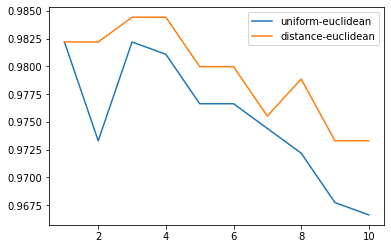

In [98]:
import matplotlib.pyplot as plt
plt.plot(range(1,11), uniform_euclidean_acc, label='uniform-euclidean')
plt.plot(range(1,11), distance_euclidean_acc, label='distance-euclidean')
#plt.plot(range(1,11), uniform_manhattan_acc, label='uniform-manhattan')
#plt.plot(range(1,11), distance_manhattan_acc, label='distance-manhattan')
plt.legend()
#plt.savefig('foo.png')

In [82]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(2, weights='uniform', metric="euclidean", algorithm="brute")

# Train the classifier
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=2)

In [83]:
y_test_pred = clf.predict(X_test)
metrics.accuracy_score(y_test, y_test_pred)

0.9733036707452726

In [15]:
np.round(clf.predict_proba(X_test)[10:20,:], 2)

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. ],
       [0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [16]:
clf.predict(X_test)[10:20]

array([0, 9, 9, 8, 4, 2, 3, 6, 8, 3])